# An Introduction to Dimensionality Reduction

### The curse of dimensionality

I know in the previous module-Supervised Machine Learning- we often said that the more data you have the better for your model performance. In reality, this is not always the case, hence the 'Curse of Dimensionality'. This is a scenario where the model effectiveness, accurracy deteriorates with the increase in dimensions- the more features you have.

*So how come a model can perform poorly the more features it has, aren't we feeding it with more information?*

Well, not quite...
In high-dimensional spaces, the feature space is extremely large, which makes the data points become sparse. Think of it this way, if you have 100 data points, if you fit them along a 1D line, they will take up more space along the line, now imagine fitting those same data points in a 52D feature space- they will occupy a very small area of the feature space- which means most of the high-dimensional space is empty!


### Impact of the curse
1. Since the data points are so sparse in the high-dimensional space, it would mean your model needs to learn very complex relationships (across all these dimensions), so there is a high risk of learning from noise and overfitting the data.
2. High-dimensional data is very computationally expensive to model.
3. It is very hard to visualize high-dimensional data, which makes EDA tricky!



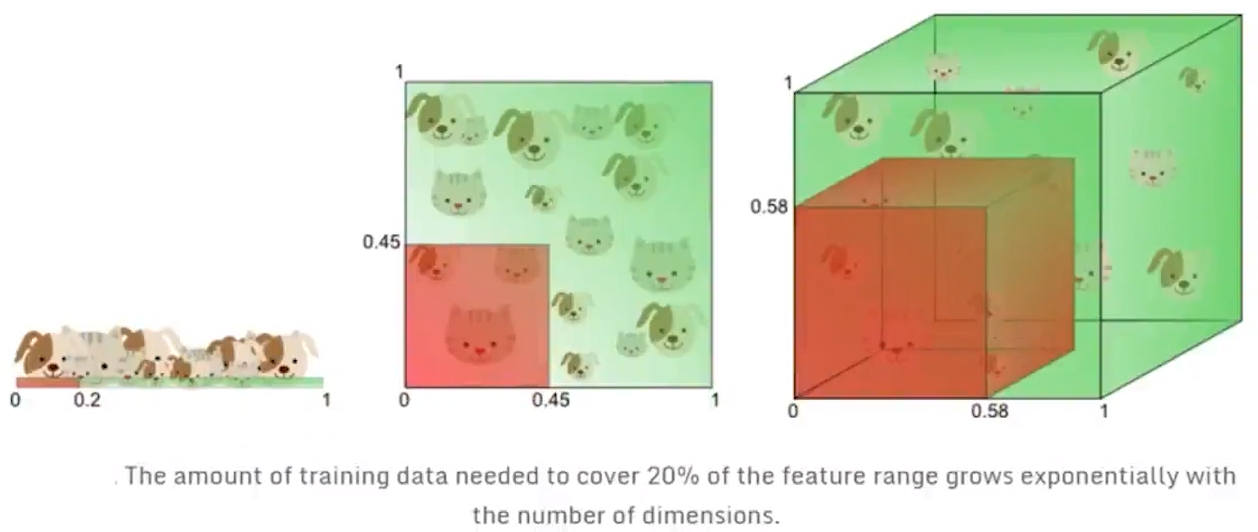